# Testes com extração Valor.xls
Extração realizada no DW, consulta Dashboard Laudos - Variação US$/kg

DashBoard Laudos - Variação US$/kg 3 meses

{MES REGIS}=Out 2017:201710, Nov 2017:201711, Dez 2017:201712 E {DIA BASE REGIS}=07 E {PESO LIQ MERC IMP} >= 100



In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
caminho = os.path.join('..', 'app', 'datasources')
for name in os.listdir(caminho):
    if 'xls' in name: print(name)

NCM.xlsx
valor7.xlsx
valor12.xlsx


In [110]:
df_valor7 = pd.read_excel(os.path.join(caminho, 'valor7.xlsx'), header=4)

In [111]:
df_valor12 = pd.read_excel(os.path.join(caminho, 'valor12.xlsx'), header=4)

In [112]:
df_valor7.head()

,MES REGIS,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
0,Out 2017,1717666045,70,13,1.887671
1,Out 2017,1717666045,85,13,2.357686
2,Out 2017,1717666037,70,13,0.365931
3,Out 2017,1717666029,39,13,1.113465
4,Out 2017,1717666010,88,13,123.998856


In [113]:
df_valor12.head()

,MES REGIS,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
0,Out 2017,1717264591,39,7,93.576613
1,Out 2017,1717264591,40,7,19.260949
2,Out 2017,1717264591,45,7,100.031250
3,Out 2017,1717264591,56,7,15.039062
4,Out 2017,1717264591,73,7,12.114140


In [114]:
df_valor = pd.concat([df_valor7, df_valor12])

In [192]:
def get_valor_capncnm(pdf, capncm):
    return pdf[pdf['COD CAPIT NCM'] == capncm]['PRECO DOLAR /Kg IMP']

In [131]:
df_valor[df_valor['COD CAPIT NCM'] == 70].describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
count,1.145000e+03,1145.0,1145.000000,1145.000000
mean,1.720058e+09,70.0,10.448035,342.716349
std,1.409156e+06,0.0,2.967652,3192.556146
min,1.717260e+09,70.0,7.000000,0.175000
25%,1.719236e+09,70.0,7.000000,2.833185
50%,1.719657e+09,70.0,13.000000,12.495642
75%,1.721326e+09,70.0,13.000000,37.071429
max,1.721747e+09,70.0,13.000000,74293.333333


In [132]:
df_valor.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
count,8.796700e+04,87967.000000,87967.000000,8.796700e+04
mean,1.719968e+09,66.154831,10.478986,1.899843e+04
std,1.392786e+06,23.709454,2.961532,1.455525e+06
min,1.717260e+09,1.000000,7.000000,0.000000e+00
25%,1.719225e+09,40.000000,7.000000,5.697386e+00
50%,1.719638e+09,76.000000,13.000000,2.299241e+01
75%,1.721322e+09,85.000000,13.000000,1.374544e+02
max,1.721747e+09,97.000000,13.000000,3.294620e+08


In [164]:
import numpy as np
def remove_outliers(df, campo):
    return df[np.abs(df[campo] - df[campo].mean()) <= (2 * df[campo].std())]

def get_valor_capncnm2(df, capncm):
    df = df[df['COD CAPIT NCM'] == capncm]
    return remove_outliers(df, 'PRECO DOLAR /Kg IMP')['PRECO DOLAR /Kg IMP']

In [138]:
df_valor2 = remove_outliers(df_valor, 'PRECO DOLAR /Kg IMP')

In [139]:
df_valor2.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
count,8.791600e+04,87916.000000,87916.000000,8.791600e+04
mean,1.719968e+09,66.168195,10.479298,1.933359e+03
std,1.392893e+06,23.703107,2.961482,4.285617e+04
min,1.717260e+09,1.000000,7.000000,0.000000e+00
25%,1.719225e+09,40.000000,7.000000,5.692333e+00
50%,1.719638e+09,76.000000,13.000000,2.295441e+01
75%,1.721322e+09,85.000000,13.000000,1.369941e+02
max,1.721747e+09,97.000000,13.000000,2.908500e+06


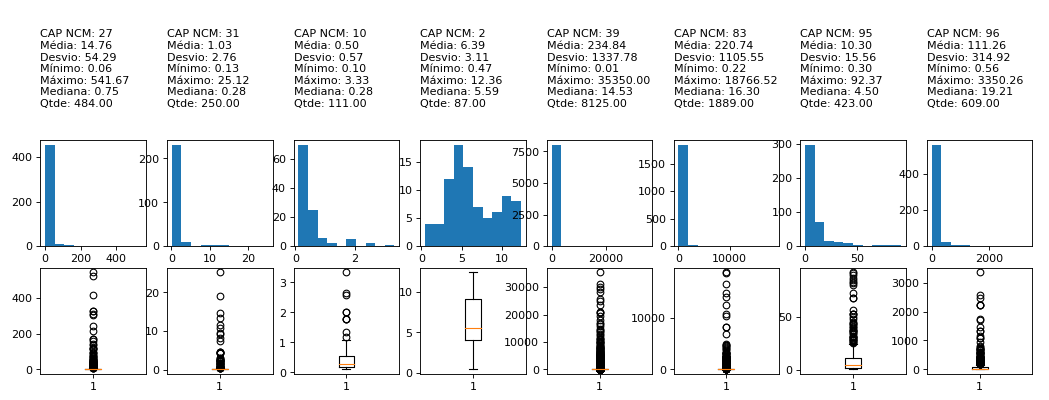

In [182]:
def resumo(pdf):
    capsncm = [27, 31, 10, 2, 39, 83, 95, 96]
    cols = len(capsncm)
    i = 1
    plt.figure(figsize=(16, 6), dpi=80)
    for cap in capsncm:
        df = get_valor_capncnm(pdf, cap)
        ax = plt.subplot(3, cols, i)
        ax.axis('off')
        text = f'CAP NCM: {cap}\n' + \
               f'Média: {df.mean():.2f}\n' + \
               f'Desvio: {df.std():.2f}\n' + \
               f'Mínimo: {df.min():.2f}\n' + \
               f'Máximo: {df.max():.2f}\n' + \
               f'Mediana: {df.median():.2f}\n' + \
               f'Qtde: {df.count():.2f}\n'
        plt.text(0, 0, s=text)
        plt.subplot(3, cols, i + cols)
        plt.hist(df, bins=10)
        plt.subplot(3, cols, i + cols * 2)
        plt.boxplot(df)
        i +=1

    plt.show()
resumo(df_valor2)

In [183]:
df = get_valor_capncnm(df_valor, 95)
df.describe()

count    423.000000
mean      10.303555
std       15.561576
min        0.301151
25%        1.843650
50%        4.503023
75%       11.199991
max       92.369281
Name: PRECO DOLAR /Kg IMP, dtype: float64

In [184]:
df_valor7b = pd.read_excel(os.path.join(caminho, 'valor7b.xlsx'), header=4)

In [185]:
df_valor7b.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP,PESO LIQ MERC IMP
count,1.945000e+04,19450.000000,19450.0,19450.000000,1.945000e+04
mean,1.720198e+09,62.598149,7.0,46.565275,5.350604e+04
std,1.109372e+06,25.789028,0.0,383.460605,7.455989e+05
min,1.717260e+09,2.000000,7.0,0.001452,1.000000e+02
25%,1.719226e+09,39.000000,7.0,2.656296,4.175250e+02
50%,1.719281e+09,73.000000,7.0,7.535577,2.150000e+03
75%,1.721302e+09,85.000000,7.0,20.784318,1.314284e+04
max,1.721351e+09,97.000000,7.0,32515.071322,5.311300e+07


In [186]:
df_valor13b = pd.read_excel(os.path.join(caminho, 'valor1324b.xlsx'), header=4)

In [187]:
df_valor13b.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP,PESO LIQ MERC IMP
count,4.296900e+04,42969.000000,42969.000000,42969.000000,4.296900e+04
mean,1.719607e+09,62.593661,17.009705,47.030194,6.328319e+04
std,1.405842e+06,25.751687,5.294306,514.702506,9.804905e+05
min,1.717591e+09,1.000000,13.000000,0.007694,1.000000e+02
25%,1.718341e+09,39.000000,13.000000,2.656000,4.140000e+02
50%,1.719634e+09,73.000000,13.000000,7.461090,2.111388e+03
75%,1.720443e+09,85.000000,24.000000,21.023414,1.407780e+04
max,1.722332e+09,97.000000,24.000000,44869.015635,8.288853e+07


In [188]:
df_valorb = pd.concat([df_valor7b, df_valor13b])

In [201]:
def remove_outlierscaps(pdf):
    dfcaps = []
    for capncm in pdf['COD CAPIT NCM'].unique():
        df = pdf[pdf['COD CAPIT NCM'] == capncm]
        fdf = df[np.abs(df['PESO LIQ MERC IMP'] - df['PESO LIQ MERC IMP'].mean()) <= (2 * df['PESO LIQ MERC IMP'].std())]
        dfcaps.append(fdf)
    return pd.concat(dfcaps)
    
df_valorc = remove_outlierscaps(df_valorb)

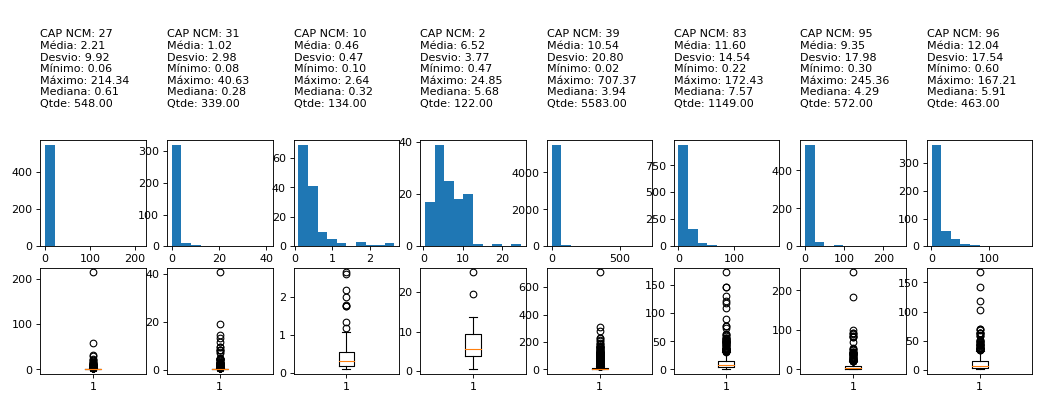

In [202]:
resumo(df_valorb)

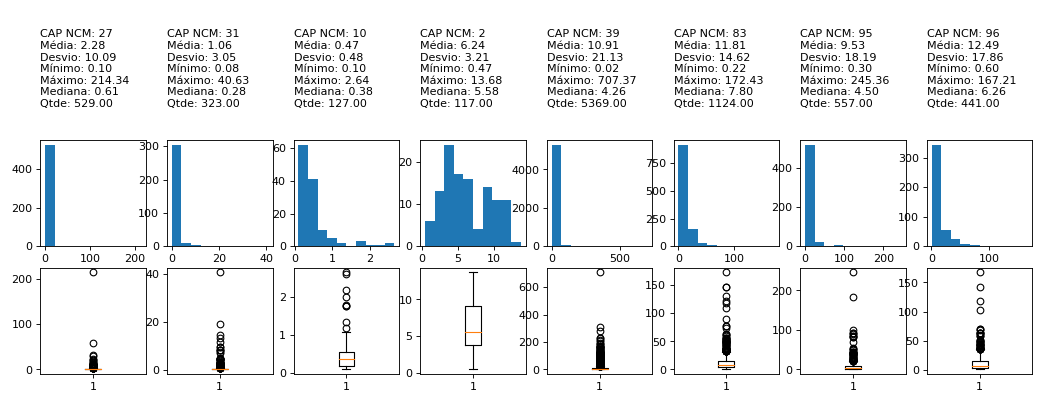

In [203]:
resumo(df_valorc)

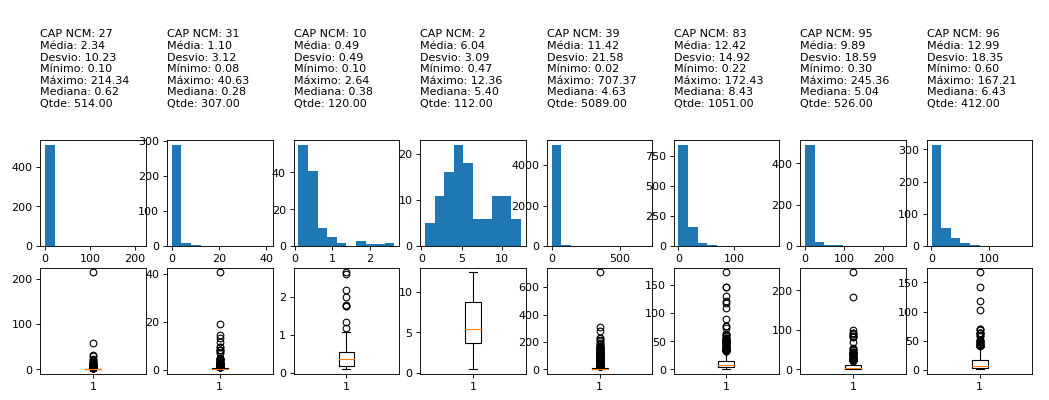

In [204]:
df_valord = remove_outlierscaps(df_valorc)
resumo(df_valord)

In [199]:
valores = get_valor_capncnm(df_valorc, 96)
valores.describe()

count    441.000000
mean      12.486069
std       17.858125
min        0.597539
25%        2.381186
50%        6.257143
75%       15.408373
max      167.213115
Name: PRECO DOLAR /Kg IMP, dtype: float64

In [200]:
valoresb = valores[np.abs(valores - valores.mean()) <= (2 * valores.std())]
valoresb.describe()

count    423.000000
mean       9.786193
std       10.360947
min        0.597539
25%        2.218315
50%        5.914700
75%       13.832613
max       48.015045
Name: PRECO DOLAR /Kg IMP, dtype: float64

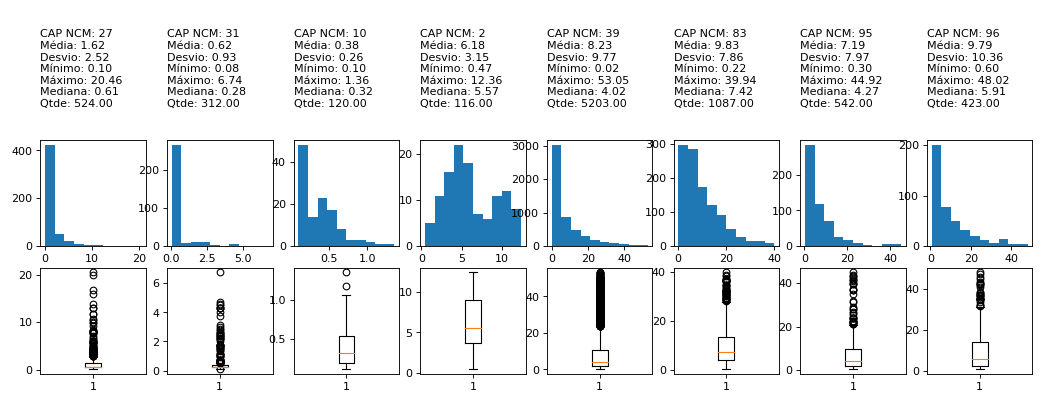

In [207]:
def resumo2(pdf):
    capsncm = [27, 31, 10, 2, 39, 83, 95, 96]
    cols = len(capsncm)
    i = 1
    plt.figure(figsize=(16, 6), dpi=80)
    for cap in capsncm:
        valores = get_valor_capncnm(pdf, cap)
        df = valores[np.abs(valores - valores.mean()) <= (2 * valores.std())]
        ax = plt.subplot(3, cols, i)
        ax.axis('off')
        text = f'CAP NCM: {cap}\n' + \
               f'Média: {df.mean():.2f}\n' + \
               f'Desvio: {df.std():.2f}\n' + \
               f'Mínimo: {df.min():.2f}\n' + \
               f'Máximo: {df.max():.2f}\n' + \
               f'Mediana: {df.median():.2f}\n' + \
               f'Qtde: {df.count():.2f}\n'
        plt.text(0, 0, s=text)
        plt.subplot(3, cols, i + cols)
        plt.hist(df, bins=10)
        plt.subplot(3, cols, i + cols * 2)
        plt.boxplot(df)
        i +=1

    plt.show()
resumo2(df_valorc)